# **Ejercicios de pair programming Módulo 2 Sprint 1**
## **Estadística: Lección 3**
### **Tablas de contingencia, correlación, sesgos e intervalos de confianza**

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st

In [10]:
games = pd.read_csv("data/games.csv", index_col = 0)

In [11]:
games.head(1)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,39000,39000,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,38000,46000,48000


Información del contenido de las columnas

Title - Title of the Game.

Release Date - Date of release of the game's first version

Team - Game developer team

Rating - Average rating

Times Listed - Number of users who listed this game

Number of Reviews - Number of reviews received from the users

Genres - All genres pertaining to a specified game

Summary - Summary provided by the team

Reviews - User reviews

Plays - Number of users that have played the game before

Playing - Number of current users who are playing the game

Backlogs - Number of users who have access but haven't started with the game yet

Wishlist- Number of users who wish to play the game

1. Extraer los siguentes estadísticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia


In [12]:
# No tenemos "buenas" variables categóricas para buscar correlaciones por lo que vamos a categorizar dos variables númericas, "rating" y "number of reviews" que apriori pensamos que pueden tener relación.

In [13]:
def cambiar_rating(col):
    if col < 2.50:
        return "suspenso"
    elif col < 3.50:
        return "aprobado"
    elif col <= 4.50:
        return "notable"
    else:
        return "sobresaliente"

In [14]:
games["notas_rating"] = games["Rating"].apply(cambiar_rating)

In [15]:
def cambiar_reviews(col):
    if col < 100:
        return "muy poco popular"
    elif col < 500:
        return "poco popular"
    elif col <= 1000:
        return "bastante popular"
    else:
        return "muy popular"

In [16]:
games["popularidad"] = games["Number of Reviews"].apply(cambiar_reviews)

In [17]:
games_crosstab = pd.crosstab(games["notas_rating"], games["popularidad"])
games_crosstab

popularidad,bastante popular,muy poco popular,muy popular,poco popular
notas_rating,,,,
aprobado,88,32,15,214
notable,378,34,334,344
sobresaliente,3,9,9,17
suspenso,6,8,0,21


In [18]:
games["popularidad"].value_counts()

poco popular        596
bastante popular    475
muy popular         358
muy poco popular     83
Name: popularidad, dtype: int64

- Coeficiente de correlación de las variables numéricas del dataset.


In [19]:
games_corr = games.corr(numeric_only = True)
games_corr

,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
Rating,1.000000,0.392524,0.392524,-0.026843,0.151015,0.393681,0.375355
Times Listed,0.392524,1.000000,1.000000,0.065578,0.477747,0.649100,0.585801
Number of Reviews,0.392524,1.000000,1.000000,0.065578,0.477747,0.649100,0.585801
Plays,-0.026843,0.065578,0.065578,1.000000,-0.030658,0.186266,0.126875
Playing,0.151015,0.477747,0.477747,-0.030658,1.000000,0.429380,0.398100
Backlogs,0.393681,0.649100,0.649100,0.186266,0.429380,1.000000,0.626160
Wishlist,0.375355,0.585801,0.585801,0.126875,0.398100,0.626160,1.000000


- Sesgos de alguna de las variables numéricas del dataset.


In [20]:
games_sesgo_nr = skew(games["Number of Reviews"])
games_sesgo_nr

2.006265605802721

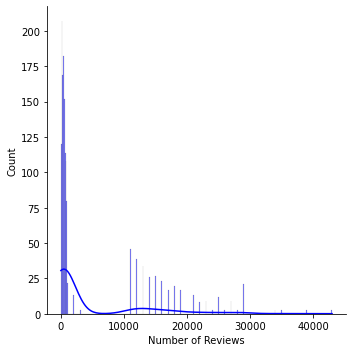

In [21]:
sns.displot(games["Number of Reviews"], color = "b", kde = True)

In [22]:
games_sesgo_pl = skew(games["Plays"])
games_sesgo_pl

0.9827053959218762

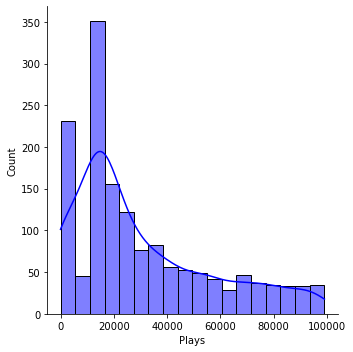

In [25]:
sns.displot(games["Plays"], color = "b", kde = True)

In [23]:
games_sesgo_wl = skew(games["Wishlist"])
games_sesgo_wl

1.9988946192526016

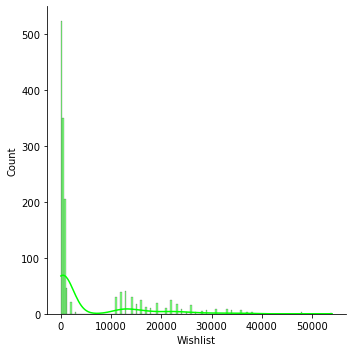

In [27]:
sns.displot(games["Wishlist"], color = "lime", kde = True)

- Intervalo de confianza de algunas de las variables numéricas del dataset


In [36]:
# El tamaño de la muestra es 1512. Establecemos un nivel de confianza de 95%. 


intervalo_confianza_nr = st.t.interval(alpha=0.95, df=len(games["Number of Reviews"]), loc = np.mean(games["Number of Reviews"]), scale = st.sem(games["Number of Reviews"]))
intervalo_confianza_nr

(3957.6340498788836, 4747.951928957096)

In [37]:
intervalo_confianza_pl = st.t.interval(alpha=0.95, df=len(games["Plays"]), loc = np.mean(games["Plays"]), scale = st.sem(games["Plays"]))
intervalo_confianza_pl

(28884.756765030234, 31537.876832853366)

In [38]:
intervalo_confianza_wl = st.t.interval(alpha=0.95, df=len(games["Wishlist"]), loc = np.mean(games["Wishlist"]), scale = st.sem(games["Wishlist"]))
intervalo_confianza_wl

(4422.889008366184, 5309.6202508930755)

2. Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

In [39]:
games_crosstab

popularidad,bastante popular,muy poco popular,muy popular,poco popular
notas_rating,,,,
aprobado,88,32,15,214
notable,378,34,334,344
sobresaliente,3,9,9,17
suspenso,6,8,0,21


Algunas conclusiones sobre estos ejercicios:

- Tras categorizar dos de las variables hemos conseguido obtener una tabla de contingencia con datos que nos parecen interesantes y sobre todo interpretables. En la categoría de juegos más populares, donde consideramos se sitúan muchos de los outliers, los registros categorizados se agrupan principalmente en torno al notable. La popularidad no garantiza el sobresaliente. También entre los pocos populares el rating alcanza el notable, lo que nos hace pensar en la tendencia a puntuar relativamente alto y a que los datos se corresponden con lo que arroja la media del rating (3,71) y la moda (4.1). 

- Los intervalos de confianza, en la línea de lo comentado en los ejercicios de los días anteriores en el caso de los datos de las columnas Wishlist y Number of Reviews, no podemos considerarlos de validez, al estar basado en estadísticos poco robustos. Como ya hemos comentado los outliers de estas distribuciones distorsionan los datos. Esto es menos acusado en la columna Plays donde podemos considerar que el intervalo tiene algo de sentido. 

- Visto los resultados del trabajo de los últimos días llegamos a la conclusión de que habría que dividir el conjunto de datos en dos subconjuntos bastante diferenciados, que serían los juegos muy populares (outliers en la columna "Numbers of Reviews) y juegos menos populares o más de nicho. 